In [0]:
#-*- coding: utf-8 -*-

<img align="right" style="max-width: 200px; height: auto" src="https://i.imgur.com/iNjt9Ic.png">

# Exercise 10 - "Machine Learning II: <br /> Supervised Learning"

Fundamentals and Methods of Computer Science, University of St. Gallen, Autumn Term 2019

## Introduction
In this assignment we will continue where we left off with the previous one. Last week, you have learned to evaluate performance of Machine Learning models, now we will actually train such models. In this exercise we will cover training and evaluation of two common **classifiers**: Naive Bayes and k-Nearest Neighbors (kNN). Next week in our last exercise, we will train **Neural Networks** to classify images.

<img align="center" style="max-width: 800px; height: auto" src="https://i.imgur.com/iv6NSf0.png">

Before we start let's watch another motivational video:

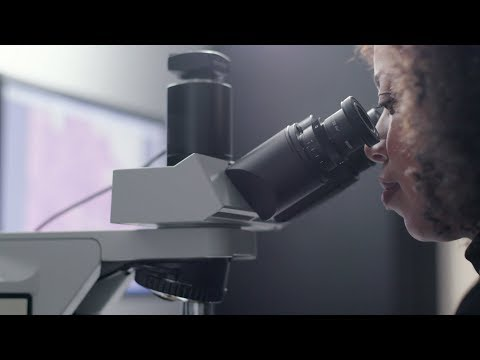

In [40]:
from IPython.display import YouTubeVideo
# Google AI: "Detecting cancer in real-time with machine learning"
YouTubeVideo('9Mz84cwVmS0', width=1024, height=576)

## What classifiers are we going to use?

The **Naive Bayes (NB)** classifier belongs to the family of simple "probabilistic classifiers" based on applying Bayes' theorem with a strong (naive) independence assumptions between the features. Naive Bayes has been studied extensively since the 1950s and remains an accessible (baseline) method for text categorization as well as other domains.


The **k-Nearest Neighbors (kNN)** is a simple, easy to understand, versatile, but powerful machine learning algorithm. Until recently (prior to the advent of deep learning approaches) it was used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. 

## Exercise structure
The following exercise is structured according to the following tasks:

**Task 1:** Gaussian Naive Bayes Classification - 4 points
> 1.1  Calculation of the Prior Probabilities $P(y)$ of each Class  
> 1.2  Calculation of the Evidence $P(x)$ of each Feature  
> 1.3  Calculation of the likelihood $P(x|y)$ of each Feature  
> 1.4  Calculation of the Posterior Probabilities $P(y|x)$ of sample $x$ belonging to the given classes  

**Task 2:** k-Nearest-Neighbors Classification - 4 points
> 2.1 Dataset Pre-Processing    
> 2.2 Distance Between (potential) Neighbors    
> 2.3 Choosing the Class from the Neighbors   
> 2.4 k-Nearest-Neighbor (kNN) Classification  
> 2.5 kNN Performance over Different `k` Values

**Task 3:** Supervised Learning - Understanding (Multiple Choice) - 2 points

## Setup of the Assignment Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this assignment will use [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [sklearn](https://scikit-learn.org/), [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) libraries. Let's import the libraries by the execution of the statements below:

In [0]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm as nm

# import sklearn data and data pre-processing libraries
#import sklearn
from sklearn import datasets

# import sklearn naive.bayes and k-nearest neighbor classifier library
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # displays data nicely in Notebook environment

#Enable inline Jupyter notebook plotting:
plt.ion()

# set grading variable to False to test your code it will be set to True during grading
if __name__ == '__main__':
    grading = False
else:
    grading = True

## Task 1: Gaussian "Naive Bayes" (NB) Classification

One popular (and remarkably simple) algorithm is the **Naive Bayes Classifier**. Note that one natural way to address a given classification task is via the probabilistic question: **What is the most likely class $\hat{y}$ given a set of observations $x$?** Formally, we wish to output a prediction for $y$ by calculating its posterior probabilities $P(y|x)$ given the expression:

$$\hat{y} = \arg \max_{y} P(y|x)$$

In probability theory, the posterior probability refers to the probability of observing a particular class $y$ after taking into consideration all the available information $x$. 

If features could only take on small number of values (e.g. yes/no, low/medium/high) you could just count classes for each set of feature values and compute the probability belonging to certain class from that. 

In our case however, features are real-valued and are all different between observations. Computing probabilities directly would unfortunately require that we estimate $P(y | \mathbf{x})$ for every value of $\mathbf{x} = x_1, x_2, ..., x_n$. Even if we approximate, that is computationally infeasible in most cases. Moreover, this would lead to model working on the data in sample and not working for new "unseen" observations.

One solution to this challenge is the so-called **Bayes' theorem** (alternatively Bayes' rule) that you learned about in the lecture. It provides an elegant way of calculating class posterior probabilities $P(y|x)$ without the need of seeing every single possible example. Let's briefly revisit the formula of the Bayes' theorem below:

<img align="center" style="max-width: 400px; height: auto" src="https://i.imgur.com/ToFW8Sy.png">

In the formula of the **Bayes' theorem** above,

>- $P(y|x)$ denotes the **posterior** probability of class $y$ given a set of features $x$ denoted by $x_1, x_2, ..., x_n$.
>- $P(y)$ denotes the **prior** probability of observing class $y$.
>- $P(x|y)$ denotes the **likelihood** which is the probability of a feature $x$ given class $y$.
>- $P(x)$ denotes the **evidence** which is the general probability of observing feature $x$.

Now, using the **chain rule** of probability, we can express the likelihood term $P( \mathbf{x} | y)$ as:

$$P( \mathbf{x} | y) = P(x_1 | y) \cdot P(x_2 | x_1, y) \cdot ... \cdot P( x_n | x_1, ..., x_{n-1}, y)$$

By itself, this expression doesn't get us any further. We still need (in a worst case) estimate roughly $2^d$ parameters. The trick of the (naive) Bayes' theorem however is to assume that the distinct features $x_1, x_2, ..., x_n$ are conditionally independent from each other given a particular class $y$. 

Using this assumption we're in much better shape, as the likelihood term $p( \mathbf{x} | y)$ term simplifies to: 

$$P( \mathbf{x} | y) = P(x_1 | y) \cdot P(x_2 | y) \cdot ... \cdot P( x_n | y) = \prod^n_i P(x_i | y)$$

Estimating each term in $\prod^n_i p(x_i | y)$ amounts to estimating just one feature distribution. So our assumption of conditional independence has taken the complexity of our model (in terms of the number of parameters) from an exponential dependence on the number of features to a linear dependence. Hence, we call it the **"naive"** Bayes' theorem, since it makes the naive assumption about feature independence, so we don't have to care about dependencies among them.

## Dataset Download and Data Assessment (not graded)

The **Iris Dataset** is a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **classes**),  namely the Iris Setosa, the Iris Versicolour, and, the Iris Virginica) and their respective measured petal and sepal length (referred to as **features**).

<img align="center" style="max-width: 700px; height: auto" src="https://i.imgur.com/hWq26HC.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 700px; height: auto" src="https://i.imgur.com/l3O5crc.png">

Further details of the dataset can be obtained from the following publication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

In [42]:
## do not change this cell ##
if not grading:
    # load data set
    iris = datasets.load_iris()
    # Print and inspect the names of the four features contained in the dataset:
    print ('Feature names:', iris.feature_names)
    # Determine dimensionality of the feature dataset & target variable:
    print('Feature dimension:', iris.data.shape)
    print('Target dimension:', iris.target.shape)
    # Print and inspect the names of the three classes contained in the dataset:
    print('Classes:', iris.target_names)   

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature dimension: (150, 4)
Target dimension: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


Let's save it as DataFrame and inspect the top five feature rows of the Iris Dataset:

In [43]:
## do not change this cell ##
if not grading:
    #convert dataset to pandas dataframe
    df = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names),
                    pd.Series(iris.target,name='target',dtype='category').cat.rename_categories(iris.target_names)],axis=1)
    #print top 5 results
    display(df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's now conduct a more in-depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

Please note that we use Python's **Seaborn** library to create such a plot referred to as **Pairplot**. The Seaborn library is a powerful data visualization library based on the Matplotlib. It provides a great interface for drawing informative statistical graphics (https://seaborn.pydata.org). 

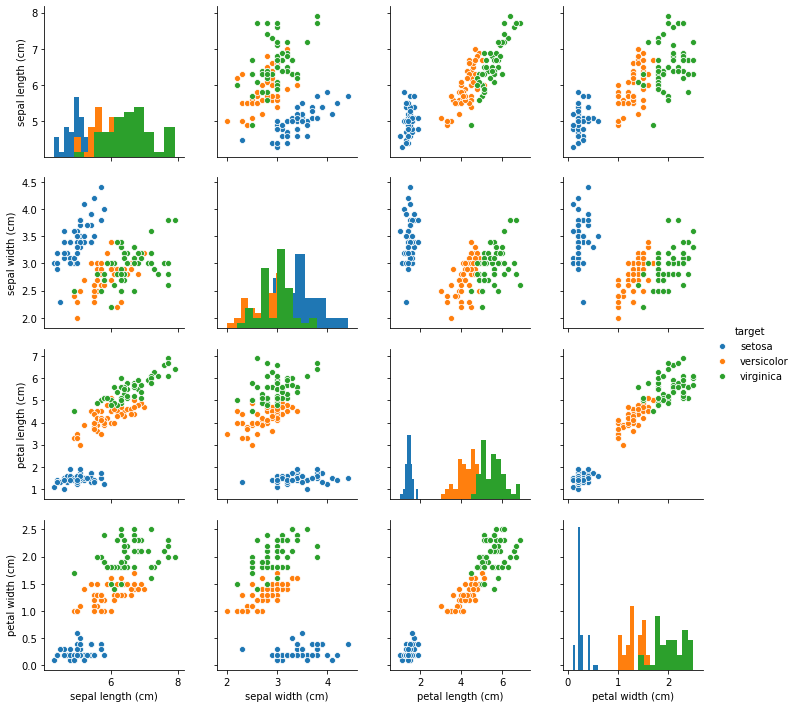

In [44]:
## do not change this cell ##
if not grading:
    # plot a pairplot of the distinct feature distributions
    sns.pairplot(df, diag_kind='hist', hue='target');

It can be observed from the created Pairplot, that most of the feature measurements that correspond to flower class "setosa" exhibit a nice **linear seperability** from the feature measurements of the remaining flower classes. In addition, the flower classes "versicolor" and "virginica" exhibit a commingled and **non-linear separability** across all the measured feature distributions of the Iris Dataset.

As discussed in the last lab we need to separate dataset into a **training set** (the fraction of data records solely used for training purposes) and a **test set** (the fraction of data records solely used for testing purposes). We set the fraction of testing records to **30%** of the original dataset:

<img align="center" style="max-width: 500px; height: auto" src="https://i.imgur.com/RPhWoQA.png">

In [0]:
## do not change this cell ##
if not grading:
    test_fraction = 0.3 
    # make results reproducable
    random_seed = 42 
    # 70% training and 30% evaluation
    x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=test_fraction, random_state=random_seed, stratify=None)

## Task 1.1: Calculation of the prior probabilities $P(y)$ of each Class

First, we need to calculating the prior probability $P(y)$ of each class iris flower contained in the dataset. Therefore, we first obtain the number of occurrences of each class in the extracted training data and we divide the class counts by the overall number of observations contained in the extracted training data:

In [0]:
#Task 1.1
def calculate_prior(x_data):
    '''
    Function to compute prior probability per class
    
    Implement the function using only numpy and pandas
    return 1-d array of probabilities (length = number of classes)
    Hint: use numpy.unique to get unique classes
    
    :param x_data: input data as numpy ndarray. Rows correspond to objects/samples, columns to the features.

    :return:prior: numpy ndarray containing priors per class.
    '''
    
    ### your code here ###

    classes, counter = np.unique(x_data, return_counts=True)
    total_sample = len(x_data)
    

    prior = np.asarray([x/total_sample for x in counter])
    
    
    
    ### all done ###
    
    return prior 

In [47]:
## do not change this cell ##
if not grading:
    pr = calculate_prior(y_train)
    display(pd.DataFrame(pr[None,:], columns=iris.target_names, index=['prior']))

,setosa,versicolor,virginica
prior,0.295238,0.352381,0.352381


Your output should look something like:
```
            setosa	versicolor	virginica
prior	0.295238	0.352381	0.352381
```

## Task 1.2: Calculation of the Evidence $P(x)$ of each Feature

Let's now calculate the general probability of observing feature $𝑥$ which denotes the evidence $P(x)$ of a feature.

During the lecture you learned that evidence distribution can be approximated by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. This simplification is justified by the application of the "law of large numbers" or "Central Limit Theorem" (you may want to have a look at further details of the theorem under: https://en.wikipedia.org/wiki/Central_limit_theorem). In general, the probability density of a Gaussian "Normal" distribution, as defined by the formula below. It is parametrized its mean $\mu$ and corresponding standard deviation $\sigma$:

<img align="center" style="max-width: 500px; height: auto" src="https://i.imgur.com/77B66ni.png">

Using the "law of large numbers" we will approximate the probability density $P(x) \approx \mathcal{N}(x | \mu, \sigma)$ of each feature by a Gaussian. So as a first step we need to estimate $\mu$ and $\sigma$ for each feature.

In [0]:
#Task 1.2.1
def calculate_evidence_mu_sigma(x_data): #For each feature (4 mus and 4 sigmas)
    '''
    Function to compute mean and standard deviation of features in the dataset
    Implement the function using only numpy and pandas

    
    
    Return 2 arrays, first containing means of features and second their standard deviation
      
    :param x_data: input data as numpy ndarray. Rows correspond to objects/samples, columns to the features.

    :return:
        - mu - numpy ndarray containing means per feature
        - sigma - numpy ndarray containing standard deviation per feature
    '''
    
    ### your code here ###

    
    
    
    means = np.mean(x_data, axis=0)
    std_dev = np.std(x_data, axis=0)
    
    ### all done ###
    
    return [means, std_dev]

In [49]:
## do not change this cell ##
if not grading:
    mu_evid, sigma_evid = calculate_evidence_mu_sigma(x_train)
    #show results
    display(pd.DataFrame(np.concatenate([mu_evid[None,:], sigma_evid[None,:]]),
                         columns=iris.feature_names, index=['mu','sigma']))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mu,5.842857,3.009524,3.870476,1.239048
sigma,0.829326,0.416910,1.713138,0.739175


Let's now plot the approximate Gaussian (Normal) probability density distribution $P(x) \approx \mathcal{N}(\mu, \sigma)$:

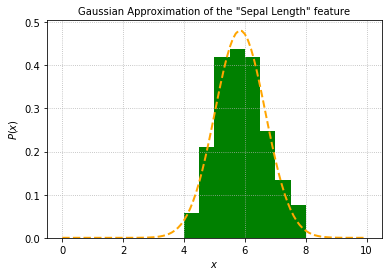

In [50]:
## do not change this cell ##
if not grading:
    # prepare plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # calculate the probability density function of the Gaussian distribution
    hist_gauss_sepal_length = nm.pdf(np.arange(0, 10, 0.1), mu_evid[0], sigma_evid[0])

    # plot fitted "gaussian" or normal distribution
    ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length, color='orange', linestyle='--', linewidth=2)

    # plot histogram of "sepal length" observations
    ax.hist(x_train[:, 0], bins=20, range=(0, 10), density=True, color='green')

    # add grid
    ax.grid(linestyle='dotted')

    # add axis range and legends
    ax.set_xlabel("$x$", fontsize=10)
    ax.set_ylabel("$P(x)$", fontsize=10)

    # add plot title
    ax.set_title('Gaussian Approximation of the "Sepal Length" feature', fontsize=10);

Now we can aggregate the evidence for a single observation based on its features

In [0]:
#Task 1.2.2
def calculate_evidence(obs, mu, sigma):
    '''
    Function to compute evidence for observation based on its features 
    and estimated mu and sigma
    
    Implement the function using only numpy and pandas
    
    Return single evidence value for observation (all features combined)
    
    Hint: evidence for observation is product of evidences for each feature
      
    :param obs: numpy ndarray or list of features
    :param mu: numpy ndarray or list of feature means
    :param sigma: numpy ndarray or list of feature means

    :return: evidence: numpy ndarray containing priors per class.
    '''
    cols = len(obs)

    ### your code here ###

    #MY COMMENT LAST LINE OF DOCSTRING IS QUESTIONABLE ; ALSO WHAT DO THEY MEAN PER CLASS
    #MY COMMENT ALSO TO LAST LINE OF DOCSTRING, DO WE NEED TO ACCOUNT FOR SEVERAL ROWS, E.G. SEVERAL OBSERVATIONS IN ONE TRY
    
    
    #pi = np.pi
    #e = np.exp(1)

    probability_evidence = 1
    for i in range(0,cols):
      probability_evidence *= nm.pdf(obs[i], mu[i], sigma[i])
      
      #1/((2*pi*sigma[i]**2)**0.5)*e**(-(obs[i]-mu[i])**2/(2*sigma[i]**2))
      
      #nm(mu[i], sigma[i]).pdf(obs[i])

    
    evidence = probability_evidence
    
    ### all done ###
    
    return evidence

In [52]:
## do not change this cell ##
if not grading:
    sepal_length = 5.8 
    sepal_width  = 3.5
    petal_length = 1.5
    petal_width  = 0.25
    obs = [sepal_length, sepal_width, petal_length, petal_width]
    ev = calculate_evidence(obs, mu_evid, sigma_evid)
    print('Evidence for random example:', ev)
    
    # if we were to make some unrealistic example we would get very low evidence:
    sepal_length = 15
    obs = [sepal_length, sepal_width, petal_length, petal_width]
    ev = calculate_evidence(obs, mu_evid, sigma_evid)
    print('Evidence for unrealistic example approaches zero:', ev)


    # MY COMMENT WE SLIGHTLY GET A DIFFERENT VALUE IS THAT AN ERROR OR A ROUNDING ERROR OR A WRONG OUTPUT

Evidence for random example: 0.00453608748310886
Evidence for unrealistic example approaches zero: 1.5241725386096942e-29


Your output should look something like:
```
Evidence for random example: 0.00453608748310886  
Evidence for unrealistic example approaches zero: 1.5241725386096942e-29
```

## Task 1.3: Calculation of the likelihood $P(x|y)$ of each Feature

Let's now see how we can calculate the **likelihood** $P(x|y)$ which is the probability density of a feature given a certain class $y$. We will again can estimate $P(x|y)$ by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$ applying the "law of large numbers".

The **likelihood** probability density of a Gaussian "Normal" distribution, as defined by the formula below, is determined by its mean $\mu$, standard deviation $\sigma$ and its corresponding class condition $y$:

<img align="center" style="max-width: 500px; height: auto" src="https://i.imgur.com/77B66ni.png">

We are again able to determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma, y)$ of each feature given the class using the $\mu$ and $\sigma$:

In [0]:
#Task 1.3.1
def calculate_likelihood_mu_sigma(x_data, y_data): #calculate the likelihood of each feature , given a certain class (12 mus and 12 sigmas (4*3))
    '''    
    Function to compute mean and standard deviation of each feature conditioned on the class
    return two 2-d arrays, first containing means of features per class and second their standard deviations per class
    Example: 
    m, s = calculate_likelihood_mu_sigma(data_x, data_y)
    m[i][j] then should contain mean in class "i" for feature "j"
    and analagous s should contain standard deviations
    Hint: extract list of classes by using .unique() function from numpy
    Hint2: when calculating standard deviation please use unbiased estimator (with n-1 degrees of freedom)
           this corresponds to "ddof=1" parameter in numpy (in pandas it is default)
    
    Implement the function using only numpy and pandas
      
    :param x_data: input data as numpy ndarray. Rows correspond to objects/samples, columns to the features.
    :param y_data: numpy ndarray containing labels for observations. Rows correspond to objects/samples

    :return:
        - mu_list - list of numpy ndarray containing means per feature conditioned on class
        - sigma_list - list of numpy ndarray containing standard deviation per feature conditioned on class
    '''
    
    ### your code here ###
    classes = np.unique(y_data)
    #cols = x_data.shape[1]

    mu_list = []
    sigma_list = []

    """
    for i in range(0,len(classes)):
      mean_array = np.zeros(cols)
      sigma_array = np.zeros(cols)
      for j in range(0, cols):
        array = x_data[y_data==classes[i]]
        values = [x[j] for x in array]
        
        mean_array[j] = np.mean(values)
        sigma_array[j] = np.std(values, ddof=1)

      mu_list.append(mean_array)
      sigma_list.append(sigma_array)
    """

    for cls in classes:
      
      mu_list.append(np.mean(x_data[y_data==cls], axis=0))
      sigma_list.append(np.std(x_data[y_data==cls], ddof=1, axis=0))

    ### all done ###
        
    return [mu_list, sigma_list]

In [54]:
## do not change this cell ##
if not grading:
    mu_lik, sigma_lik = calculate_likelihood_mu_sigma(x_train, y_train) #store output in temp variables
    #show results
    print('Conditioned on class "' + iris.target_names[0] + '":')
    display(pd.DataFrame(np.concatenate([mu_lik[0][None,:], sigma_lik[0][None,:]]),columns=iris.feature_names, index=['mu','sigma']))
    print('\n\nConditioned on class "' + iris.target_names[1] + '":')
    display(pd.DataFrame(np.concatenate([mu_lik[1][None,:], sigma_lik[1][None,:]]),columns=iris.feature_names, index=['mu','sigma']))
    print('\n\nConditioned on class "' + iris.target_names[2] + '":')
    display(pd.DataFrame(np.concatenate([mu_lik[2][None,:], sigma_lik[2][None,:]]),columns=iris.feature_names, index=['mu','sigma']))

Conditioned on class "setosa":


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mu,4.964516,3.377419,1.464516,0.248387
sigma,0.340145,0.375686,0.185380,0.109151




Conditioned on class "versicolor":


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mu,5.862162,2.724324,4.210811,1.302703
sigma,0.531952,0.299449,0.495975,0.206137




Conditioned on class "virginica":


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mu,6.559459,2.986486,5.545946,2.005405
sigma,0.658896,0.314609,0.544464,0.297159


Let's now plot the approximate Gaussian (Normal) probability density distribution $P(x | y) \approx \mathcal{N}(\mu, \sigma, y)$ for selap length in different classes:

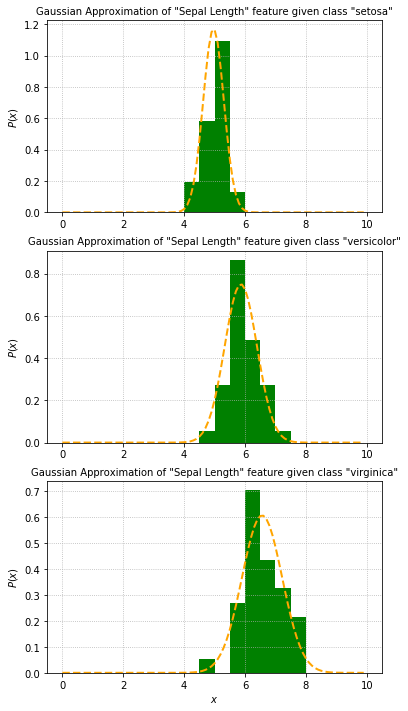

In [55]:
## do not change this cell ##
if not grading:
    # prepare plot
    fig, ax = plt.subplots(3, figsize=(6,12))
    
    for i in range(3): # do for 3 classes
        # calculate the probability density function of the Gaussian distribution for each class
        hist_gauss_sepal_length = nm.pdf(np.arange(0, 10, 0.1), mu_lik[i][0], sigma_lik[i][0])

        # plot fitted "gaussian" or normal distribution
        ax[i].plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length, color='orange', linestyle='--', linewidth=2)

        # plot histogram of "sepal length" observations given the class "setosa"
        ax[i].hist(x_train[y_train==i, 0], bins=20, range=(0, 10), density=True, color='green')

        # add grid
        ax[i].grid(linestyle='dotted')

        # add axis range and legends
        ax[i].set_ylabel("$P(x)$", fontsize=10)

        # add plot title
        ax[i].set_title('Gaussian Approximation of "Sepal Length" feature given class "' + iris.target_names[i] + '"', fontsize=10);
    
    # add lable to x axis in the final chart
    ax[2].set_xlabel("$x$", fontsize=10)


Now we can aggregate likelihood for one single observation based on its corresponding features

In [0]:
#Task 1.3.2
def calculate_likelihood(obs, mu_list, sigma_list):  
    '''
    Function to compute likelihood for observation per class based on its class conditional mu and sigmas
    Return array of likelihood values for each class
    Hint: class likelihood for observation is product of likelihoods for each feature
    
    Implement the function using only numpy and pandas
      
    :param obs: numpy ndarray or list of features
    :param mu_list: list of numpy ndarrays of feature means conditioned on class 
    :param sigma_list: list of numpy ndarrays of feature means conditioned on class

    :return: likelihood: numpy array containing likelihoods for each class.
    '''
    
    ### your code here ###
    
    pi = np.pi
    e = np.exp(1)
    


    likelihood = np.zeros(len(mu_list))
    for i in range(0, len(mu_list)):
      mu_cls = mu_list[i]
      sig_cls = sigma_list[i]
      prob_cls = 1

      for j in range(0, len(mu_cls)):
          prob_cls *= nm.pdf(obs[j], mu_cls[j], sig_cls[j])#1/((2*pi*sig_cls[j]**2)**0.5)*e**(-(obs[j]-mu_cls[j])**2/(2*sig_cls[j]**2))
      likelihood[i] = prob_cls

    

    
    ### all done ###
    
    return likelihood

In [57]:
## do not change this cell ##
if not grading:
    sepal_length = 5.8 
    sepal_width  = 3.5
    petal_length = 1.5
    petal_width  = 0.25
    obs = [sepal_length, sepal_width, petal_length, petal_width]
    lk = calculate_likelihood(obs, mu_lik, sigma_lik)
    display(pd.DataFrame(lk[None,:], columns=iris.target_names, index=['likelihood']))

,setosa,versicolor,virginica
likelihood,0.446529,3.818522e-14,2.769972e-21


Your result should look something like this:
```
                setosa	versicolor	virginica
likelihood	0.446529	3.818522e-14	2.769972e-21
```

## Task 1.4: Calculation of the Posterior Probabilities $P(y|x)$ of sample $x$ belonging to the given classes

Now we have can implement a function to train all parameters at the same time: 

In [0]:
#Task 1.4.1
def train_nb_parameters(x_data, y_data):
    '''
    Function to train parameters of Gaussian Naive Bayes model
    Return prior, evidence mu, evidence sigma, likelihood mu and likelihood sigma

    Implement the function using only numpy and pandas
      
    :param x_data: input data as numpy ndarray. Rows correspond to objects/samples, columns to the features.
    :param y_data: numpy ndarray containing labels for observations. Rows correspond to objects/samples

    :return:
        - prior - numpy ndarray containing priors per class
        - mu_evid - numpy ndarray containing means per feature
        - sigma_evid - numpy ndarray containing standard deviation per feature
        - mu_lik - list of numpy ndarray containing means per feature conditioned on class
        - sigma_lik - list of numpy ndarray containing standard deviation per feature conditioned on class
    '''
    
    ### your code here ### 

    prior = calculate_prior(y_data)
    mu_evid, sigma_evid = calculate_evidence_mu_sigma(x_data)
    mu_lik, sigma_lik = calculate_likelihood_mu_sigma(x_data, y_data)
    
    

        
    ### all done ###
    
    return [prior, mu_evid, sigma_evid, mu_lik, sigma_lik]

In [59]:
## do not change this cell ##
if not grading:
    prior, mu_evid, sigma_evid, mu_lik, sigma_lik = train_nb_parameters(x_train, y_train)
    print("prior:", prior, "\n")
    print("evidence mu: ", mu_evid, "\n") 
    print("evidence sigma: ", sigma_evid, "\n") 
    print("likelihood mu:")
    display(mu_lik) 
    print("likelihood sigma:")
    display(sigma_lik) 

    #MY COMMENT ARE OUTPUT VALUES CORRECT

prior: [0.2952381  0.35238095 0.35238095] 

evidence mu:  [5.84285714 3.00952381 3.87047619 1.23904762] 

evidence sigma:  [0.82932642 0.41691013 1.71313824 0.73917525] 

likelihood mu:


[array([4.96451613, 3.37741935, 1.46451613, 0.2483871 ]),
 array([5.86216216, 2.72432432, 4.21081081, 1.3027027 ]),
 array([6.55945946, 2.98648649, 5.54594595, 2.00540541])]

likelihood sigma:


[array([0.34014545, 0.37568575, 0.18537959, 0.10915117]),
 array([0.53195204, 0.29944894, 0.49597479, 0.20613707]),
 array([0.65889616, 0.31460925, 0.54446436, 0.29715872])]

Now we have determined all the necessary probabilities and probability distributions $P(y)$, $P(x)$ and $P(x|y)$ to determine if an unseen **iris flower** observation corresponds to a certain class. Let's implement the corresponding function:

In [0]:
#Task 1.4.2
def predict_probability_and_class(obs, prior, mu_evid, sigma_evid, mu_lik, sigma_lik):
    '''
    Function to predict probability for observation to belong to certain class and class with highest probability
    Return probabilities per class and class number
    
    Hint: here you have to apply Bayes formula, but the result will not be porbability, but a "score"
    Hint2: You have to normalize the score to obtain probability (divide all elements of the score by their sum)
    
    Implement the function using only numpy and pandas
      
    :param obs: numpy ndarray or list of features
    :param prior: numpy ndarray containing priors per class
    :param mu_evid: numpy ndarray or list of feature means
    :param sigma_evid: numpy ndarray or list of feature means
    :param mu_lik: list of numpy ndarrays of feature means conditioned on class 
    :param sigma_lik: list of numpy ndarrays of feature means conditioned on class

    :return:
        - prob - numpy ndarray containing probabilities to belong each class
        - clas - value indicatig predicted class
    '''
    
    ### your code here ###

    #MY COMMENT DONT KNOW WHAT THEY AND HOW THEY WOULD NORMALIZE

    evidence = calculate_evidence(obs, mu_evid, sigma_evid)
    likelihood = calculate_likelihood(obs, mu_lik, sigma_lik)
    prior = calculate_prior(obs)

    score = np.zeros(len(mu_lik))
    for i in range(0,len(mu_lik)):
      
      score[i] = (prior[i] * likelihood[i]) / evidence

    sum_score = np.sum(score)
    
    for i in range(0,len(score)):
      score[i] = score[i]/sum_score

    prob = score
    clas = np.argmax(prob)
    ### all done ###
    
    return  prob, clas

Now let us test how the function works:

In [61]:
## do not change this cell ##
if not grading:
    # check some feature 
    obs = x_test[0]
    prob, clas = predict_probability_and_class(obs, prior, mu_evid, sigma_evid, mu_lik, sigma_lik)
    display(pd.DataFrame(prob[None,:],columns=iris.target_names, index = ["Probability"]))
    print("Predicted Class: " + iris.target_names[clas])
    print("True Class: " + iris.target_names[y_test[0]])

,setosa,versicolor,virginica
Probability,3.425478e-85,0.994927,0.005073


Predicted Class: versicolor
True Class: versicolor


Now we can make prediction for the whole training and testing data sets and check accuracy. You could also apply techniques learned in the previous lab to compute other performance measures such as precision, recall, etc. (Not graded)

In [62]:
## do not change this cell ##
if not grading:
    #create array of the same dimension for training labels
    pred_train = y_train.copy() 
    for i in range(len(pred_train)): 
        _, pred_train[i] = predict_probability_and_class(x_train[i], prior, mu_evid, sigma_evid, mu_lik, sigma_lik)
    print("Training accuracy:",sum(pred_train == y_train)/len(pred_train))

    #create array of the same dimension for testing labels
    pred_test = y_test.copy() 
    for i in range(len(pred_test)): 
        _, pred_test[i] = predict_probability_and_class(x_test[i], prior, mu_evid, sigma_evid, mu_lik, sigma_lik)
    print("Testing accuracy:",sum(pred_test == y_test)/len(pred_test))

Training accuracy: 0.9428571428571428
Testing accuracy: 0.9777777777777777


Phew... this was complicated :) Luckily, there is a Python library named `sklearn` (https://scikit-learn.org) that provides a variety of machine learning algorithms that can be easily interfaced using the Python programming language. It also contains supervised classification algorithms such as the **Gaussian Naive-Bayes** classifier which we can use of the shelf. 

In [63]:
## do not change this cell ##
if not grading:
    # initialize classifier
    gnb = GaussianNB(priors=None, var_smoothing=1e-09)
    # train model
    gnb.fit(x_train, y_train)
    # make prediction 
    pred_train = gnb.predict(x_train)
    pred_test = gnb.predict(x_test)
    print("Training accuracy:",sum(pred_train == y_train)/len(pred_train))
    print("Training accuracy:",sum(pred_test == y_test)/len(pred_test))
    

Training accuracy: 0.9428571428571428
Training accuracy: 0.9777777777777777


You can compare your results with these, you should hopefully get the same.

# Task 2: k-Nearest-Neighbors (kNN) Classification

Now, let's have a closer look into a non-parametric method used for classification, the **k-Nearest-Neighbors (kNN)** method.

A kNN classifier predicts class labels based on known samples with similar properties. To set you up for why the neighborhood of a unknown sample might be a good indicator for its class, let's take a look at the following figure.

<img align="center" style="max-width: 600px; height: auto" src="https://i.imgur.com/81Rp4nV.png">

[source](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

The markers symbolize samples, the colors different classes. In many cases, the landscape looks like in the figure above: samples of the same class *populate* similar regions, while other classes generally *live* somewhere else. If we get the *location* of a new sample of which we don't know the class yet, it therefore makes sense to take a look at the neighborhood: what are the dominant classes there? The new sample probably belongs to the same class as the samples around it. 


**k-Nearest-Neighbor (kNN)** classification is the systematic use of that observation. It predicts class labels of unknown samples based on it's `k` known neighbors. Let's briefly revisit the distinct steps of the algorithm as discussed in the lecture:  

<img align="center" style="max-width: 600px; height: auto" src="https://i.imgur.com/l45GtsW.png">

For each new sample, the neighborhood is identified (step 2). In step 3, a sample is classified by a majority vote of its neighborhood, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer). If k = 1, then the sample is simply assigned to the class of that single nearest neighbor.

Because new samples are classified by neighbors, for which the classes are known, k Nearest-Neighbor generally requires no training. Instead, when we classify a new sample, we look for the 'k' nearest neighbors and choose the class label of the dominant class. We can organize the method by the following steps:
> 1. **distance** of the new sample to all training samples -> we'll implement the **get_distance** function to compute the distance between two samples.
> 2. **sort** the objects by distance and get the `k` closest samples or neighbors. We'll do that in the kNN main function **make_knn_prediction**.
> 3. **class label prediction** of the new sample from the neighbors -> we'll implement the majority vote in the **select_class_label_from_neighbors** function.

In the following, you will implement these steps and put it all together. First, we'll load and preprocess the dataset.

## Dataset Download and Data Assessment

The **"Wine"** dataset is a classic dataset for multi-class classification. We'll use it for this task. 

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators (types). The dataset consists of in total **178 wines** as well as their corresponding **13 different measurements** taken for different constituents found in the three types of wine. Please, find below the list of the individual measurements (features):

>- `Alcohol`
>- `Malic acid`
>- `Ash`
>- `Alcalinity of ash`
>- `Magnesium`
>- `Total phenols`
>- `Flavanoids`
>- `Nonflavanoid phenols`
>- `Proanthocyanins`
>- `Color intensity`
>- `Hue`
>- `OD280/OD315 of diluted wines`
>- `CProline`

Further details on the dataset can be obtained from the following publication: *Forina, M. et al, PARVUS - "An Extendible Package for Data Exploration, Classification and Correlation.", Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.*

Let's load the dataset and conduct a preliminary data assessment. To load and inspect the dataset, run the code in the cell below. It gives you information in input data, output data, also called *target* or *ground truth* and the dimensions of the dataset.
The pairplot visualizes the interdependency of the different dimensions of the input data. 

In [0]:
if not grading:
    wine = datasets.load_wine()

To inspect the dataset, run the code in the cell below. It gives you information in input data, output data, also called *target* or *ground truth* and the dimensions of the dataset.
The pairplot visualizes the interdependency of the different dimensions of the input data.

In [65]:
if not grading:
    # evaluate dataset
    print("### features ###")
    print(wine.feature_names)
    print("")
    print("### class names / targets / ground truth ###")
    print(wine.target_names)
    print("")
    print("### peek into raw input data ###")
    df_w = pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names),pd.Series(wine.target,name='target',dtype='category').cat.rename_categories(wine.target_names)],axis=1)
    display(df_w.head(10))
    print("")
    print(" input data shape: ", wine.data.shape ,"; target shape: ",wine.target.shape)



### features ###
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

### class names / targets / ground truth ###
['class_0' 'class_1' 'class_2']

### peek into raw input data ###


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,class_0



 input data shape:  (178, 13) ; target shape:  (178,)


<Figure size 720x720 with 0 Axes>

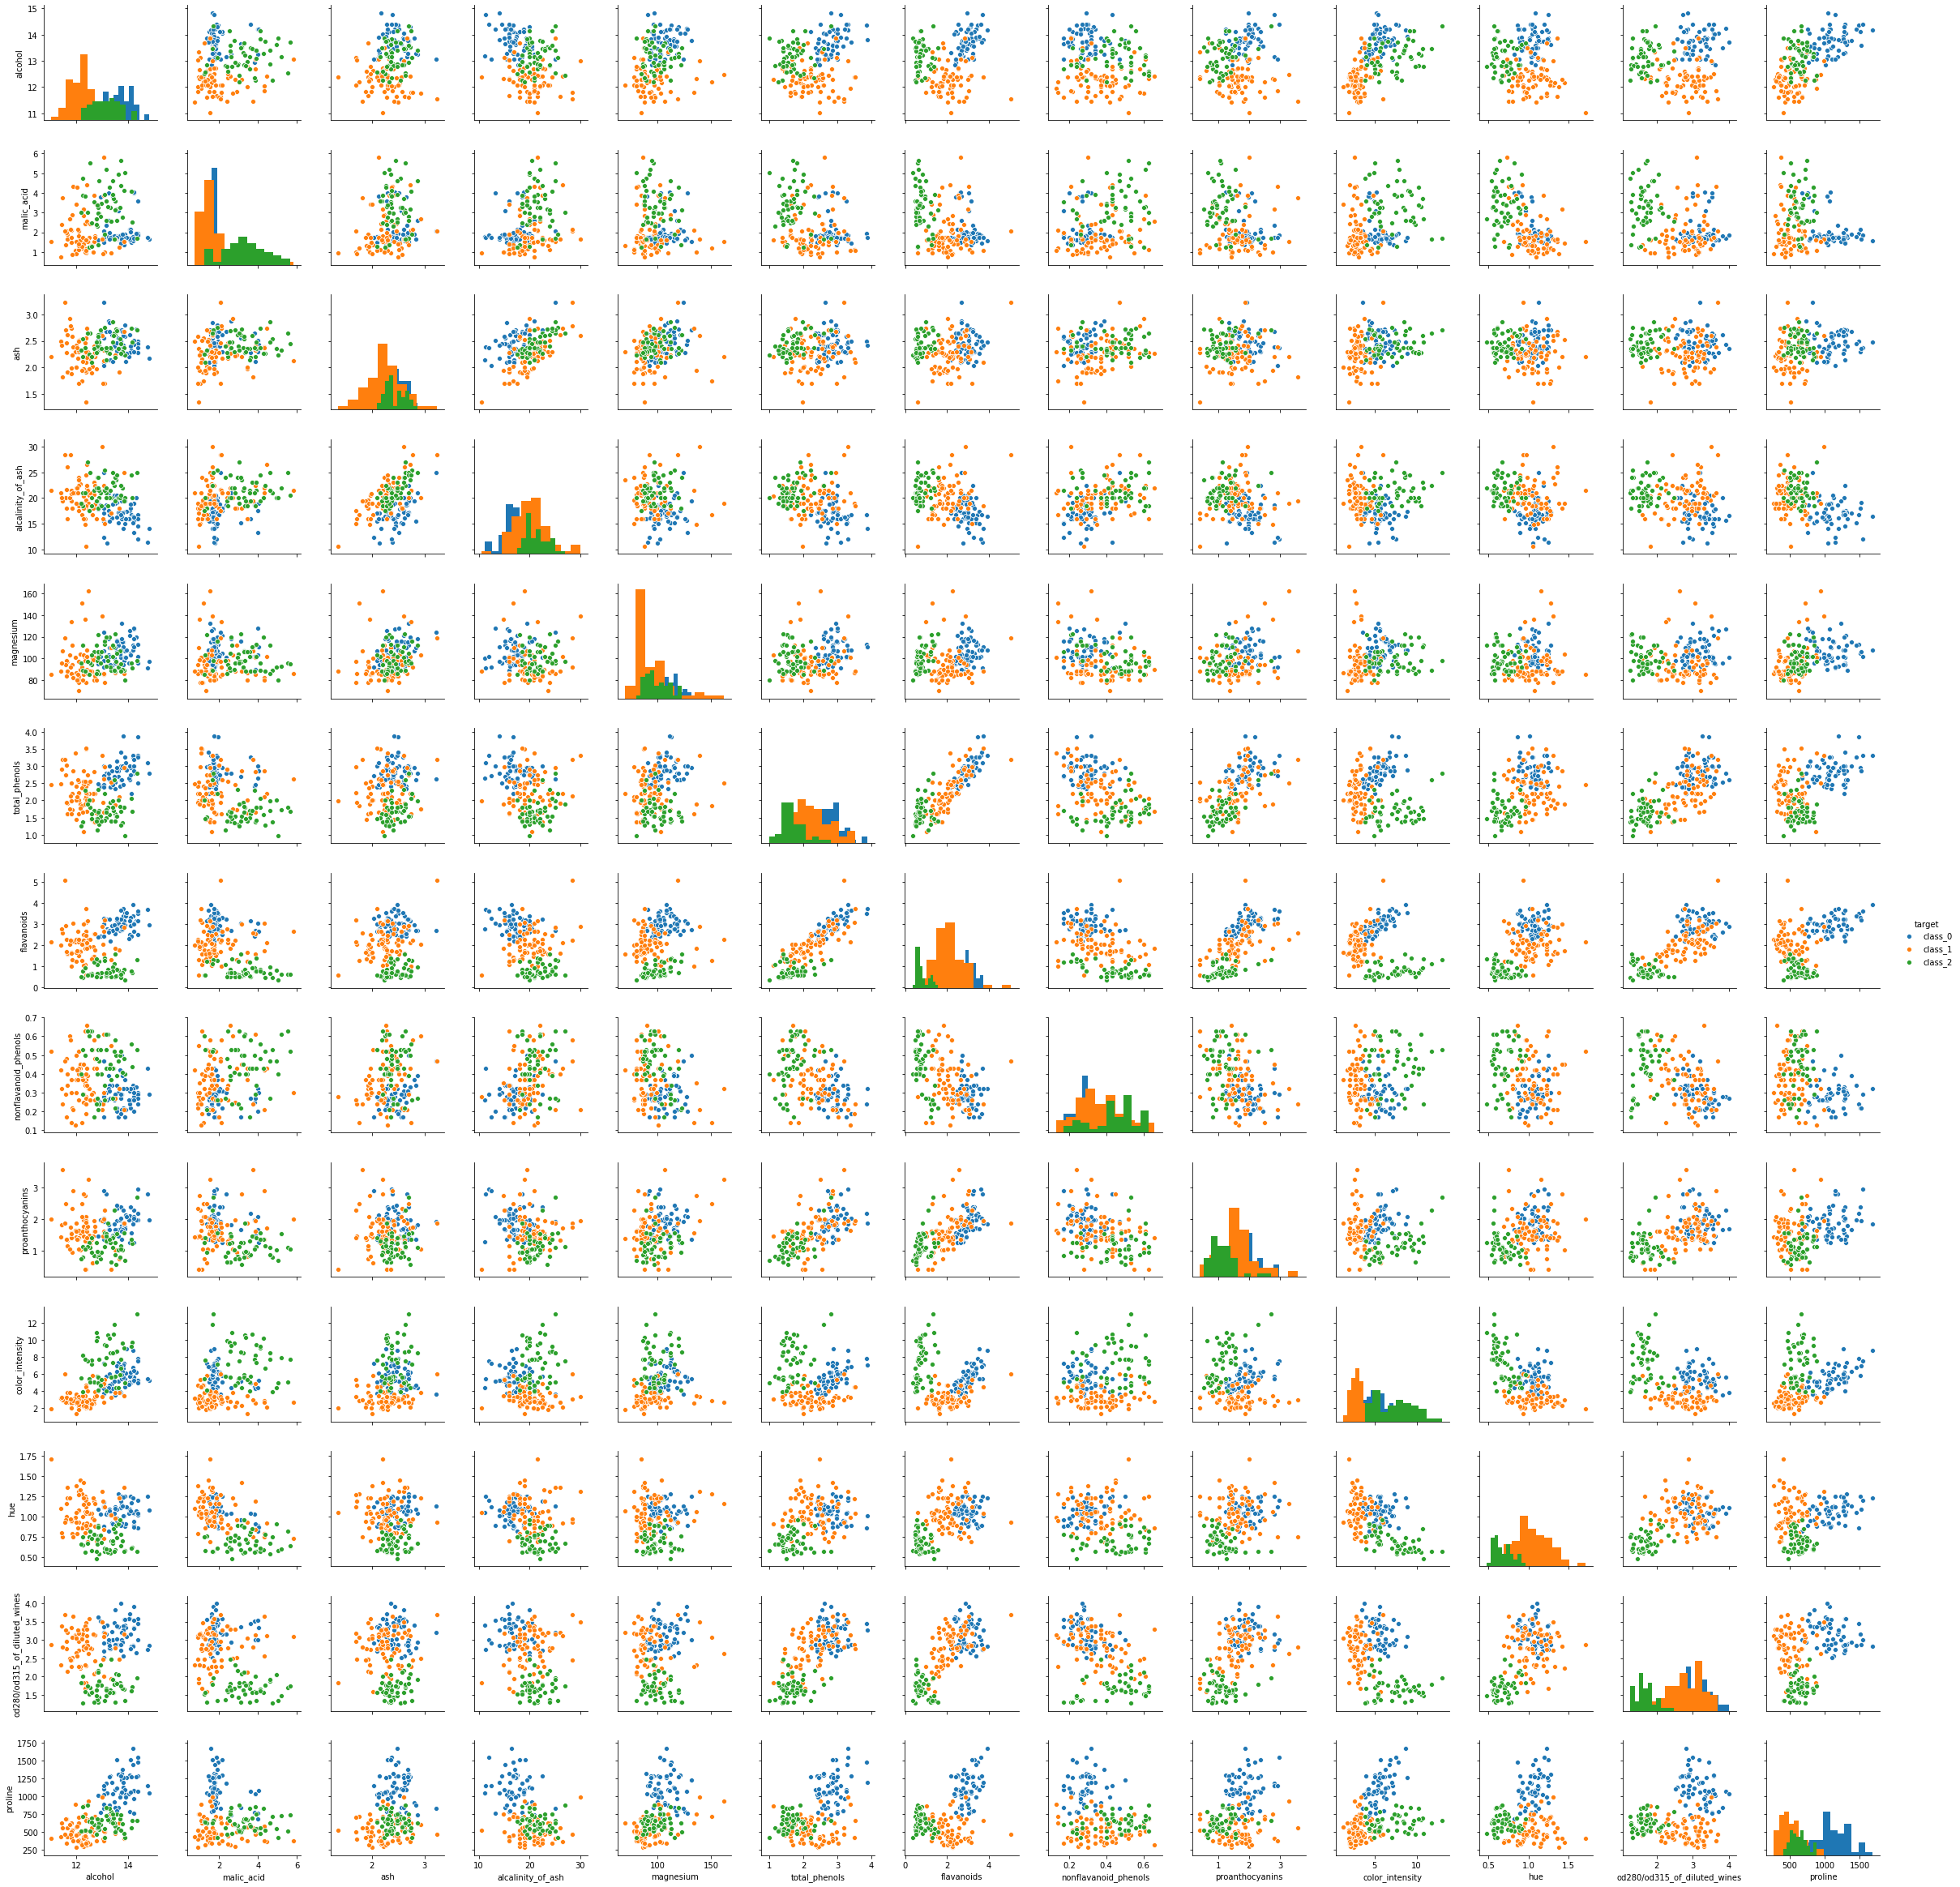

In [66]:
if not grading:    
    # init the plot
    plt.figure(figsize=(10, 10))
    # plot a pairplot of the distinct feature distributions
    sns.pairplot(df_w, diag_kind='hist', hue='target')
    plt.show()

## Task 2.1. Dataset Pre-Processing
You've learned in the last assignment, that we should split our data in two parts: one set on which we  *train* a classifier, one set with which we *test* the classifier. In our case, we will use the *training set* as the neighbors to base the predictions on. We then use the neighbors to predict the classes of the *test* set and see how well we've done. You've already seen the the figure below, but repetition makes the master, right?

<img align="center" style="max-width: 600px; height: auto" src="https://i.imgur.com/RPhWoQA.png">


Another aspect you have touched upon before is **data normalization**. Nearest neighbors is the perfect method to explain and experience it, though. You'll know exactly why it's almost always a good idea when you're done with this exercise.  
If you take a look at the data or pairplot above, you will notice that the general scale of the different *features* is very different. Some are between `1` and `9`, others are smaller than `1`, again others have values larger than `1000`. If you were to compute the euclidean distance between two data points, that translates to the straight line between these points in the 13-dimensional space. It's hard to visualize more than three, but you get the idea. Now, if data in one of the dimensions is by orders of magnitude larger than the others, it dominates the length of that line. That one value determines whether or not two data points are neighbors, although that one dimension might be a really poor indicator for the *similarity* or *closeness* of the objects we compare. Because we usually do not assume to know which features are important, it is generally desirable to treat them all the same. And so, we normalize the data, so that the values of each feature is on the range `[0,1]`. For this case we consider all features are equally important. For our assignment, we'll use `min-max normalization`. 

Thankfully, it's quite straight forward. We take the features separately, so one column with the same type of data for different `samples` at a time. The feature column $\mathbf{X}$ has the entries $x_i$. We return normalized entries $z_i$ of the normalized feature column $\mathbf{Z}$:

\begin{align}
& z_{i} = \frac{x_{i} - \min(\mathbf{X})}{\max(\mathbf{X}) - \min(\mathbf{X})}
\end{align}

In plain text, we take an entire input column $\mathbf{X}$, compute minimum and maximum of that column, subtract the minimum from the column and divide by the difference between min and max. Naturally, we should be careful to compute min and max before we overwrite the values of the feature column, otherwise min and max would change. 
In the end, we have a normalized input data set with all the normalized feature columns $\mathbf{Z}$.

Let's try this below. Complete the function that preprocesses the `wine` data.

In [0]:
# Task 2.1
def preprocess_data(input_data,target_data,test_share,normalization):
    """
    :param input_data: input data as numpy ndarray. Rows correspond to objects/samples, columns to the features.
    :param target_data: output or target data as numpy ndarray. Rows correspond to objects/samples.
    :param test_share: float on range ]0.0, 1.0[ (excluding 0 and 1), determining the share of test data of the entire dataset.  
    :param normalization: str, either "none" or "max". Deterimines, wether the data is normalized.

    :return: X_train, X_test, Y_train, Y_test: the (normalized) training and test data.
    
    # normalization: 
    if normalization == "max", your function should apply min-max normalization. Otherwise, don't normalize the data
    !NOTE! normalize the input_data only!
    
    # use the train_test_split() from the sklearn.model_selection module to split the data with test_share as an argument. Use random_state = 42
       
    """

    ### your code here ###


    
    if normalization == "max":
      #print(input_data)
      for col in range(0, input_data.shape[1]):
        maxim_ = np.amax(input_data[:,col])
        minim_ = np.amin(input_data[:,col])
        
        
        for j in range(0, len(input_data[:,col])):
          #print(input_data[j, col])
          input_data[j, col] = (input_data[j,col] - minim_) / (maxim_ - minim_)
          #print(input_data[j, col])
        
      
        
      #print(input_data)




    X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data,test_size=test_share, random_state = 42)

    
    
    ### all done ###
    
    return X_train, X_test, Y_train, Y_test

Let's print and inspect the normalized dataset. The output should have the same number of feature dimensions, but each feature value is between zero and one. Inspect the output and revise your normalization method if necessary.

In [68]:
# do not change this cell #
if not grading:
    # create datsets
    test_share = 0.3
    norm = None
    X_train, X_test, Y_train, Y_test = preprocess_data(wine.data.copy(),wine.target.copy(),test_share,norm)
    norm = "max"
    X_train_norm, X_test_norm, Y_train, Y_test = preprocess_data(wine.data.copy(),wine.target.copy(),test_share,norm)

    # evaluate sets
    print("### Let's check the shapes first: ###")
    print("X_train: ",X_train.shape,", X_test:",X_test.shape,", Y_train: ",Y_train.shape,", Y_test:",Y_test.shape)
    print("")
    print("### Then, let's check max and min of X_train: ###")
    display(pd.DataFrame(np.concatenate([X_train.max(axis=0)[None,:],X_train.min(axis=0)[None,:]],axis=0), index=["max", "min"]))
    print("")
    print("### Let's also check max and min of X_test: ###")
    display(pd.DataFrame(np.concatenate([X_test.max(axis=0)[None,:],X_test.min(axis=0)[None,:]],axis=0), index=["max", "min"]))
    print("")
    print("### Now, let's check the **normalized** max and min of X_train_norm: ###")
    display(pd.DataFrame(np.concatenate([X_train_norm.max(axis=0)[None,:],X_train_norm.min(axis=0)[None,:]],axis=0), index=["max", "min"]))
    print("")
    print("### Let's also check max and min of X_test_norm: ###")
    display(pd.DataFrame(np.concatenate([X_test_norm.max(axis=0)[None,:],X_test_norm.min(axis=0)[None,:]],axis=0), index=["max", "min"]))
    print("")
    print("### Lastly, let's peek into the normalized input data ###")
    display(pd.DataFrame(X_train_norm).head(10))
    print("")

    #MY COMMENT COMPLETELY NOT SURE IF THIS IS TRUE


### Let's check the shapes first: ###
X_train:  (124, 13) , X_test: (54, 13) , Y_train:  (124,) , Y_test: (54,)

### Then, let's check max and min of X_train: ###


,0,1,2,3,4,5,6,7,8,9,10,11,12
max,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,10.80,1.71,4.00,1547.0
min,11.03,0.89,1.36,10.6,70.0,0.98,0.34,0.13,0.42,1.74,0.48,1.27,278.0



### Let's also check max and min of X_test: ###


,0,1,2,3,4,5,6,7,8,9,10,11,12
max,14.34,5.51,2.86,26.5,123.0,3.52,3.93,0.63,2.81,13.00,1.31,3.82,1680.0
min,11.41,0.74,1.70,15.0,78.0,1.35,0.50,0.17,0.41,1.28,0.56,1.30,312.0



### Now, let's check the **normalized** max and min of X_train_norm: ###


,0,1,2,3,4,5,6,7,8,9,10,11,12
max,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.812287,1.0,1.0,0.905136
min,0.0,0.029644,0.0,0.0,0.0,0.0,0.0,0.0,0.003155,0.039249,0.0,0.0,0.000000



### Let's also check max and min of X_test_norm: ###


,0,1,2,3,4,5,6,7,8,9,10,11,12
max,0.871053,0.942688,0.802139,0.819588,0.576087,0.875862,0.757384,0.943396,0.757098,1.0,0.674797,0.934066,1.000000
min,0.100000,0.000000,0.181818,0.226804,0.086957,0.127586,0.033755,0.075472,0.000000,0.0,0.065041,0.010989,0.024251



### Lastly, let's peek into the normalized input data ###


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.647368,0.563241,0.443850,0.458763,0.195652,0.220690,0.029536,0.849057,0.148265,0.377133,0.268293,0.201465,0.215407
1,0.389474,0.195652,0.331551,0.510309,0.163043,0.420690,0.333333,0.358491,0.337539,0.141638,0.455285,0.842491,0.281027
2,0.342105,0.049407,0.315508,0.216495,0.717391,0.317241,0.318565,0.415094,0.741325,0.180887,0.471545,0.380952,0.336662
3,0.592105,0.177866,0.791444,0.252577,0.434783,0.558621,0.493671,0.396226,0.299685,0.283276,0.495935,0.553114,0.429387
4,0.331579,0.413043,0.459893,0.381443,0.195652,0.506897,0.402954,0.226415,0.498423,0.074232,0.544715,0.743590,0.008559
5,0.705263,0.221344,0.534759,0.309278,0.336957,0.562069,0.535865,0.264151,0.403785,0.215017,0.512195,1.000000,0.539943
6,0.750000,0.849802,0.465241,0.484536,0.108696,0.000000,0.000000,0.509434,0.085174,0.308874,0.081301,0.021978,0.097718
7,0.331579,0.132411,0.331551,0.278351,0.163043,0.541379,0.455696,0.301887,0.429022,0.138225,0.609756,0.538462,0.106990
8,0.310526,0.088933,0.208556,0.319588,0.880435,0.300000,0.198312,0.018868,0.659306,0.133959,0.650407,0.659341,0.313837
9,0.471053,0.519763,0.502674,0.458763,0.195652,0.172414,0.067511,0.509434,0.176656,0.766212,0.195122,0.175824,0.290300


## Task 2.2: Distance Between (potential) Neighbors
We now have our dataset prepared, so we can prepare the  parts for kNN. We'll start with the function that computes the distance between two samples. We'll use euclidean distance for the assignment. If you imagine each sample as a point in the 13-dimensional feature space (really, try to do this ;-) ), the eucledian distance between the points is the length of the straight line connecting the two points.
You can compute the euclidean distance between the points $\mathbf{a}$ and $\mathbf{b}$ as follows:  

\begin{equation}
dist = \sqrt{ ( (\mathbf{a} -  \mathbf{b} ) \cdot (\mathbf{a} -  \mathbf{b} ) } = \sqrt{ \sum^n_{i=1} (a_i - b_i)^2 },
\end{equation}
where $\cdot$ indicates the *scalar product* and $a_i, b_i$ are components of $\mathbf{a}$ and $\mathbf{b}$.

Complete the function below.

In [0]:
# Task 2.2
def compute_euclidean_distance(x_i,x_j):
    """
    computes the euclidean distance between x_i and x_j
    :param x_i: np.ndarray with input feature values for sample i
    :param x_j: np.ndarray with input feature values for sample j
    :return: dist: float with the euclidean distance
    
    use standard python or numpy functions to compute the distance. 
    You can use a sum, loops or a dot product.
        
    """
    
    ### your code here ###

    dist = (sum([(a - b) ** 2 for a, b in zip(x_i, x_j)]))**0.5
    
    
    
    ### all done ###
    
    return dist

Let's test your function with two samples. The sample-tombola picked 67 and 23 :)  
If you run the code below, the distance should be close to `0.971845958912949`

In [70]:
# do not change this cell
if not grading:
    test1 = X_train_norm[67,:]
    test2 = X_train_norm[23,:]
    print(compute_euclidean_distance(test1,test2))

    

0.971845958912949


## Task 2.3: Choosing the Class from the Neighbors
Imagine you have already identified the closest neighbors to your sample. You know their class and their distance to the sample for which you want to predict the class. If you remember the figure from above, we're now at step 3:

<img align="center" style="max-width: 600px; height: auto" src="https://i.imgur.com/l45GtsW.png">

How do you choose the class label for a new sample? There are several ways to go about it. You could take the `mean class` of the neighboring classes, so an average. You could also consider the actual distance value and put more weight on those classes that are closer to your test sample. Another common method is the `class majority vote`. Here, we take the `k` neighbors and count how many times each class is represented. We predict the label of the new sample by *majority vote*, so the class which has the most samples among the neighbors. In case there is a tie between classes, we'll introduce a ranking by class index: `2>1>0`. So, if class `2` and class `0` have each 3 samples among the neighbors, we predict class `2`.

We'll use exactly that and you'll implement it in the cell below. 

In [0]:
# Task 2.3
def select_class_label_from_neighbors(neighbors):
    """
    computes the mean class of the neighbors
    :param neighbors: list of lists. The outer list contains the neighbors. 
    The inner list has two entries: 1) the class of the neighbor, 2) the distance
    :return: integer selection
    
    # use class majority vote: the class with the most occurrence is the selection.
    count how many times a class exists among the neighbors. Pick the class with the highest count.
    If two classes have the same count, select the class with the higher index: 
    if all classes have equal counts: 2>1>0
    
    """
    
    ### your code here ###
    
    dct = dict()


    for n in neighbors:
      cls, dist = n
      dct[cls] = 0

    for n in neighbors:
      cls, dist = n
      dct[cls] += 1

    

    max_val = max(dct.values())

    

    max_cls = -1
    for k, v in dct.items():
      if v == max_val:
        try:
          if k > max_cls:
            max_cls = k
        except:
          pass

    selection = max_cls
    ### all done ###
    
    return selection
    

Let's test that with a list of test-neighbors. As you can easily test, both there are two neighbors with labels `1` and `2`, so `2` should be the selection.

In [72]:
# do not change this cell
if not grading:
    test_neighbors = [[2, 0.011],[1, 0.4568412],[1, 0.5589],[0, 1.7854],[2, 2.83345]]
    test_selection = select_class_label_from_neighbors(test_neighbors)
    print(test_selection)

    #MY COMMENT NOT SURE IF OUTPUT CORRECT

2


## Task 2.4: k-Nearest-Neighbor (kNN) Classification
Time to put it together! 
Let's revisit the kNN classification workflow:

> 1. **distance** of the new sample to all training samples -> we'll implement the **get_distance** function to compute the distance between two samples.
> 2. **sort** the objects by distance and get the `k` closest samples or neighbors. We'll do that in the kNN main function **make_knn_prediction**.
> 3. **class label prediction** of the new sample from the neighbors -> we'll implement the majority vote in the **select_class_label_from_neighbors** function.

We already have part 1 and 3. So all we need to do is figure out a way to sort a list. Good thing that you've already done that ;).
Remember that we need two loops: 
> 1. one over all unknow samples (rows in X_pred)  
> 2. for each unknown sample, we need to loop over all known samples (rows in X_train) to compute the distance.   

Use your `compute_euclidean_distance` function to compute the distances. Once you have all distances, sort the list of potential neighbors and eventually make a prediction with your `choose_class_from_neighbors` function.

In [0]:
# Task 2.4
def make_knn_prediction(X_train,Y_train,X_pred,k):
        
    """
    :param X_train: np.ndarray with input data of the training set
    :param Y_train: np.ndarray with target data of the training set
    :param X_pred: np.ndarray with input data of the prediction set <- we want to find labels for this set
    :param k: number of neighbors we want to consider for the classification
    
    :return: Y_pred np.ndarray with predicted class labels
    
    1) loop over all input samples
        2) loop over all training samples
            3) compute distance to all training samples in X_train 
            -> store results in a list sample_1 = ["class_label", distance]
            -> store all distances in another list neighbor_list = [sample_1, sample_2, sample_3]
               e.g. neighbor_list could look like so [[1,0.42123], [0,1.252], [2,2.3847]] (values are fictional)
               
        4) sort neighbor_list from low to high distance: use e.g. the neighbor_list.sort() or sorted() functions
        5) compute the prediction from the k neighbors: 
           make sure to pass only the k nearest neighbors to the choose_class_from_neigbors function!

    """
    
    ### your code here ###

    Y_pred_lst = []


    for pred_sample in X_pred:
      neighbor_list = []
      for train_sample, train_lbl in zip(X_train, Y_train):
        dist = compute_euclidean_distance(train_sample, pred_sample)
        
        neighbor_list.append([train_lbl, dist])
      neighbor_list.sort(key = lambda x: x[1])
      #print(neighbor_list)
        

      Y_pred_lst.append(select_class_label_from_neighbors(neighbor_list[0:k]))
      

    Y_pred = np.asarray(Y_pred_lst)
    ### all done ###
    
    return Y_pred

Let's test your kNN method to predict labels for the test data!

In [0]:
# don't change this cell
if not grading:
    Y_pred = make_knn_prediction(X_train_norm,Y_train,X_pred=X_test_norm,k=5)

#### kNN Performance (not graded)

Of course, smart people have already implemented kNN in the scikit-learn library. By implementing it yourself, you've learned how it works. However, we can use scikit-learn to compare your prediction to the sklearn prediction. You don't need to code here, but it may give you indication to revise your solution. Feel free, though, to add code here to investigate further!

In [75]:
### change this cell to your own needs :) 
if not grading:
    # instaciate the knn classifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    # fit it to the data
    knn.fit(X_train_norm, Y_train)
    # make a prediction with the test data
    Y_pred_2 = knn.predict(X_test_norm)

    # compute accuracy of both predictions 
    accuracy = metrics.accuracy_score(Y_test,Y_pred)
    accuracy_2 = metrics.accuracy_score(Y_test,Y_pred_2)

    # let's compare the shapes and values of the two predictions
    print("shape of your Y_pred:",Y_pred.shape,"; shape of sklearn Y_pred:",Y_pred_2.shape)
    print("euclidean distance between the two predictions: ", np.linalg.norm(Y_pred - Y_pred_2,2))
    print("accuracy of your Y_pred:",accuracy,"; accuracy of sklearn Y_pred:",accuracy_2)

    # let's see what happens, if we don't normalize the data!
    Y_pred = make_knn_prediction(X_train,Y_train,X_pred=X_test,k=5)
    accuracy_n = metrics.accuracy_score(Y_test,Y_pred)
    print("accuracy of your regular Y_pred:",accuracy_n, "; accuracy of the normalized Y_pred:", accuracy)


    # MY COMMENT PROBABLY NORMALIZATION IS ALREADY WRONG BUT WHY IS ALSO THE PREDICTION OF SKLEARN DIFFERENT ALREADY -> BAD SIGN

shape of your Y_pred: (54,) ; shape of sklearn Y_pred: (54,)
euclidean distance between the two predictions:  0.0
accuracy of your Y_pred: 0.9444444444444444 ; accuracy of sklearn Y_pred: 0.9444444444444444
accuracy of your regular Y_pred: 0.7222222222222222 ; accuracy of the normalized Y_pred: 0.9444444444444444


Your output could look something like this:
```
shape of your Y_pred: (54,) ; shape of sklearn Y_pred: (54,)
euclidean distance between the two predictions:  0.0
accuracy of your Y_pred: 0.9444444444444444 ; accuracy of sklearn y_pred: 0.9444444444444444
accuracy of your regular Y_pred: 0.7222222222222222 ; accuracy of the normalized Y_pred: 0.9444444444444444
```

So, we gain more than 20% accuracy just by normalizing! Impressive, isn't it? Of course, this is just one example. In other cases, things might be very different. It's always good to compare different normalization methods and evaluate the performance.

## Task 2.5: kNN Performance over different `k` Values
In this last coding task, you will use kNN with different values for `k` and plot the *accuracy* over `k`. You are free to use either your own method or sklearn as demonstrated in the cell above. This task sets you up ideally to answer Question 2.
Complete the code in the cell below.

In [0]:
# Task 2.5
def plot_accuracy_over_k():
    """
    computes the accuracy of kNN predictions on the (X_test_norm,Y_test) data for different values of `k`.
    Use (X_train_norm,Y_train) as the "neighbors", just as we've done above.
    You are free to use either your own function, or to use the sklearn library 
    for both the kNN prediction as well as the precision computation 
    """
    k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

    accuracy_list = []

    for k in k_list:
      knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
      knn.fit(X_train_norm, Y_train)
      Y_pred = knn.predict(X_test_norm)
      accuracy = metrics.accuracy_score(Y_test,Y_pred)
      accuracy_list.append(accuracy)



    

    ### your code here


    
    ### all done

    # plot the results
    fig = plt.figure(figsize=(10,10))
    plt.plot(k_list,accuracy_list)
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.title("accuracy over k")
    plt.show()



Let visualize the results in the cell below. Think about what could explain the trend of the prediction quality with growing k. How would you go about choosing `k`?   

*No answer required, this is just encouraging brain yoga* 

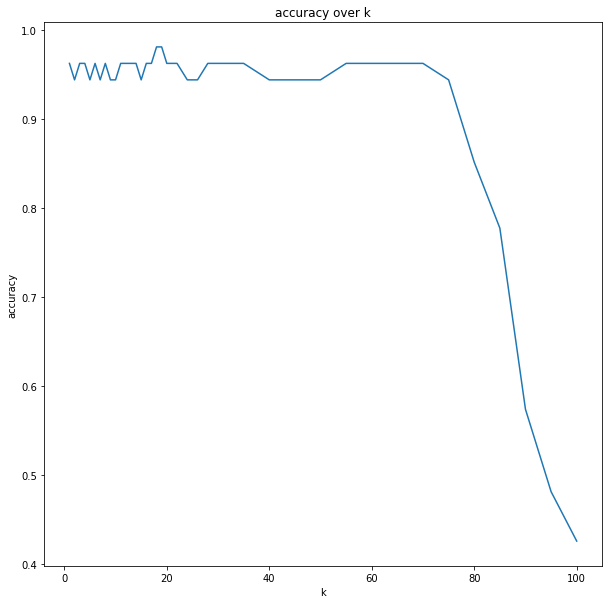

In [77]:
# do not change this cell
if not grading:
    plot_accuracy_over_k()

## Task 3: Supervised Learning - Understanding (Multiple Choice) - 2 points

**Question 1:**  
As we explained above, we used a Normal Distribution for Naive Bayes. Why?
> 1. Because we like it  -> answer_1 = 1  
> 2. `Central Limit Theory` tells us it's generally a good place to start  -> answer_1 = 2  
> 3. It's the only distribution applicable for Naive Bayes  -> answer_1 = 3  
> 4. Because Normal Distribution is not Gaussian -> answer_1 = 4  

In [0]:
# leave your answer to question 1 here
# answer_1 = [1,2,3,4]
answer_1 = 2

**Question 2:**  
`k` is the *hyperparameter* of the kNN approach. Which statement is true? (more than 1 statement can be true)
> 1. A low `k` focusses on few local neighbors  -> answer_2 = 1  
> 2. `k` should always be an even number  -> answer_2 = 2  
> 3. High values of `k` lead to oversmoothing of the predicted label  -> answer_2 = 3    
> 4. `k` must be normalized between `0.0` and `1.0`   -> answer_2 = 4

In [0]:
# leave your answer to question 1 here as a list of correct statements
# MY COMMENT CHANGED answer_1 to answer_2 since probably a copy-paste mistake
# MY COMMENT HOW IS THAT INTENDED TO WORK? JUST ENTER THE NUMBERS OF THE CORRECT ANSWERS?
# answer_2 = [1,2,3,4]

#MY COMMENT OVERSMOOTHING OF PREDICTED LABELS???
answer_2 = [1,3]